### 为什么使用seaborn?

Michael Waskom所开发的Seaborn提供了一个高层次的界面来绘制更吸引人统计图形，Seaborn 提供了一个可以快速探索分析数据不同特征的API接口,绘图函数通过调用尽量少的参数来实现可视化的过程，此外还可以通过修改附加参数的形式来自定义选项。

seaborn 是基于matplotlib开发的,大多数seaborn绘图函数的参数都由 x, y, hue, 和 data 构成(并不是所有的参数都是必须的)。如果你处理的对象是 DataFrame，那么你可以直接将列变量的名称和数据集的名称一同传递到绘图函数中

|loan_amnt|grade|sub_grade|emp_length|home_onwership|annual_inc|issue_d|loan_status|open_acc|total_pymnt|total_rec_int|
|:---:|:---:|:---:|:---:|:---:|:---:|
|贷款数额|评级|评级细分|工作年限|是否拥有房屋|年收入|发贷日期|贷款状态|开户数量|还款总额|还贷利息总额


In [41]:
import pandas as pd
import numpy as np

In [42]:
loan_data = pd.read_csv('loandata.csv') # 读取数据
loan_data.head()

,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,open_acc,total_pymnt,total_rec_int
0,5000.0,B,B2,10+ years,RENT,24000.0,2017/12/11,Fully Paid,3,5863.155187,863.16
1,2500.0,C,C4,< 1 year,RENT,30000.0,2017/12/11,Charged Off,3,1014.530000,435.17
2,12500.0,D,D4,10+ years,RENT,74400.0,2017/11/11,Fully Paid,8,14722.411910,2222.41
3,14000.0,A,A4,10+ years,RENT,72000.0,2017/11/11,fully Paid,6,15099.982530,1099.98
4,35000.0,F,F5,4 years,MORTGAGE,100000.0,2017/10/11,Fully Paid,9,48743.119270,13743.12


In [43]:
loan_data.dropna(inplace=True) # 丢掉包含缺失值的行

## 更改列名

In [44]:
loan_data.rename(columns={'grade':'grade$'},inplace=True)
loan_data.head()

,loan_amnt,grade$,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,open_acc,total_pymnt,total_rec_int
0,5000.0,B,B2,10+ years,RENT,24000.0,2017/12/11,Fully Paid,3,5863.155187,863.16
1,2500.0,C,C4,< 1 year,RENT,30000.0,2017/12/11,Charged Off,3,1014.530000,435.17
2,12500.0,D,D4,10+ years,RENT,74400.0,2017/11/11,Fully Paid,8,14722.411910,2222.41
3,14000.0,A,A4,10+ years,RENT,72000.0,2017/11/11,fully Paid,6,15099.982530,1099.98
4,35000.0,F,F5,4 years,MORTGAGE,100000.0,2017/10/11,Fully Paid,9,48743.119270,13743.12


In [45]:
loan_data.rename(columns=lambda x:x.replace('$',''), inplace=True) # 去除列名中的特殊字符
loan_data.head()

,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,open_acc,total_pymnt,total_rec_int
0,5000.0,B,B2,10+ years,RENT,24000.0,2017/12/11,Fully Paid,3,5863.155187,863.16
1,2500.0,C,C4,< 1 year,RENT,30000.0,2017/12/11,Charged Off,3,1014.530000,435.17
2,12500.0,D,D4,10+ years,RENT,74400.0,2017/11/11,Fully Paid,8,14722.411910,2222.41
3,14000.0,A,A4,10+ years,RENT,72000.0,2017/11/11,fully Paid,6,15099.982530,1099.98
4,35000.0,F,F5,4 years,MORTGAGE,100000.0,2017/10/11,Fully Paid,9,48743.119270,13743.12


## 取出分组的数据

In [46]:
grouped = loan_data[['loan_amnt','total_pymnt']].groupby(loan_data['home_ownership'])

In [47]:
for name,group in grouped:   # 字符串转变量
    locals()['loan_'+name] =group
loan_MORTGAGE.head()

,loan_amnt,total_pymnt
4,35000.0,48743.119270
8,6000.0,7235.598134
9,12000.0,16996.739990
10,4000.0,5118.676867
12,27000.0,29820.276860


## 0 导包及绘图设置
参考[seaborn文档](http://seaborn.pydata.org/api.html#categorical-api)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns # 导入seaborn包
import pandas as pd
import numpy as np
sns.set_context("notebook",font_scale=1.3) # notebook格式，放大横纵坐标标记
sns.set_palette('Set2') # 配色使用Set2  
# 内嵌模式
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # retina高清显示

In [49]:
loan_data.dropna(inplace=True) # 丢掉缺失值所在行
loan_data.drop(loan_data[loan_data['annual_inc']>500000].index,inplace=True)# 去掉annual_inc其中一个离群值绘图
loan_data.drop(loan_data[loan_data['loan_amnt']>400000].index,inplace=True)# 去掉离群值绘图
loan_numerical = loan_data.drop(loan_data.select_dtypes(include=['object']).columns,axis=1) # 数值型dataframe

## 1 线性回归拟合曲线 `lmplot`
loan_amnt 贷款数额 vs annual_inc 年收入

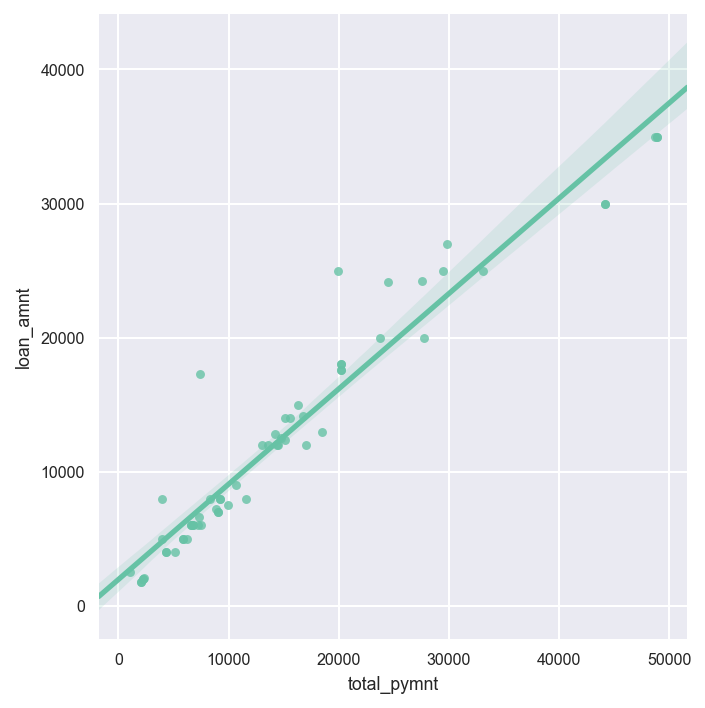

In [10]:
sns.lmplot(x='total_pymnt',
           y='loan_amnt',
           data=loan_data,
           scatter_kws={'s':20,'alpha':.8})

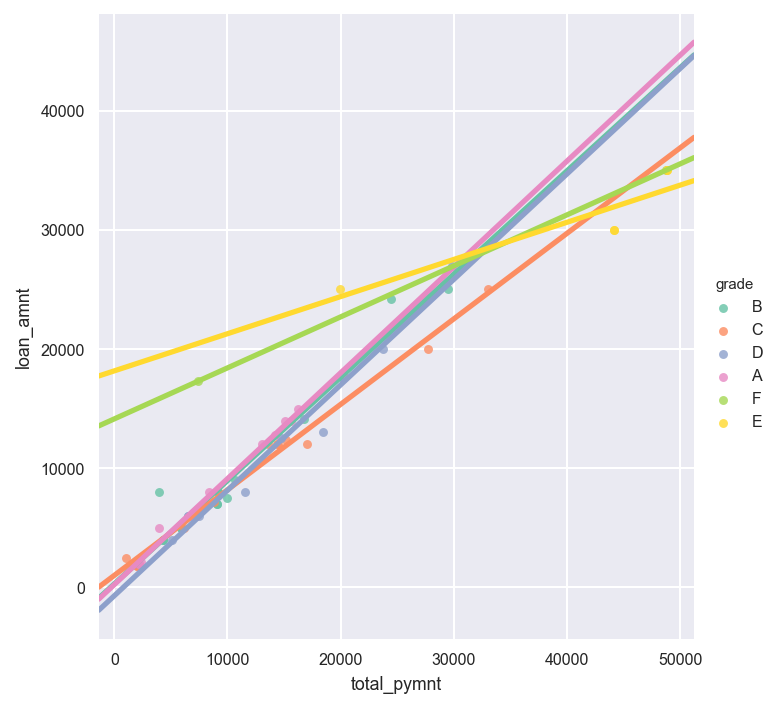

In [11]:
sns.lmplot(x='total_pymnt',
           y='loan_amnt',
           data=loan_data,
           ci=None,
           scatter_kws={'s':20,'alpha':.8},hue='grade')

## 2 联合绘图 `jointplot`

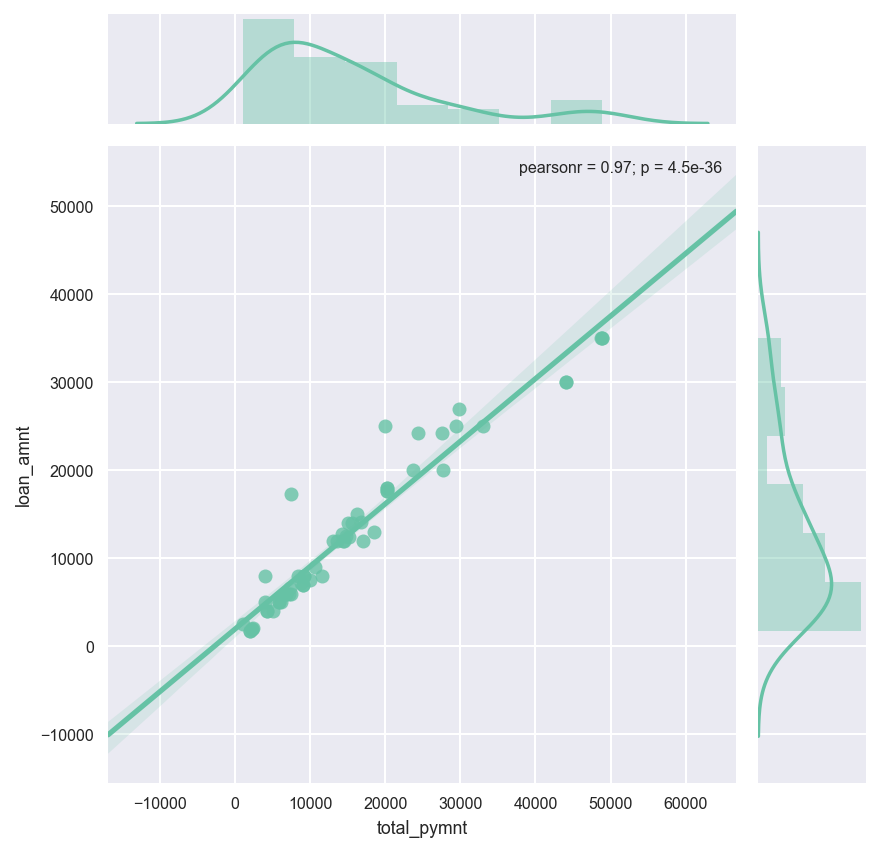

In [12]:
sns.jointplot(x='total_pymnt',
              y='loan_amnt',
              data=loan_data,
              kind='reg')

## 3 成对图 `pairplot`

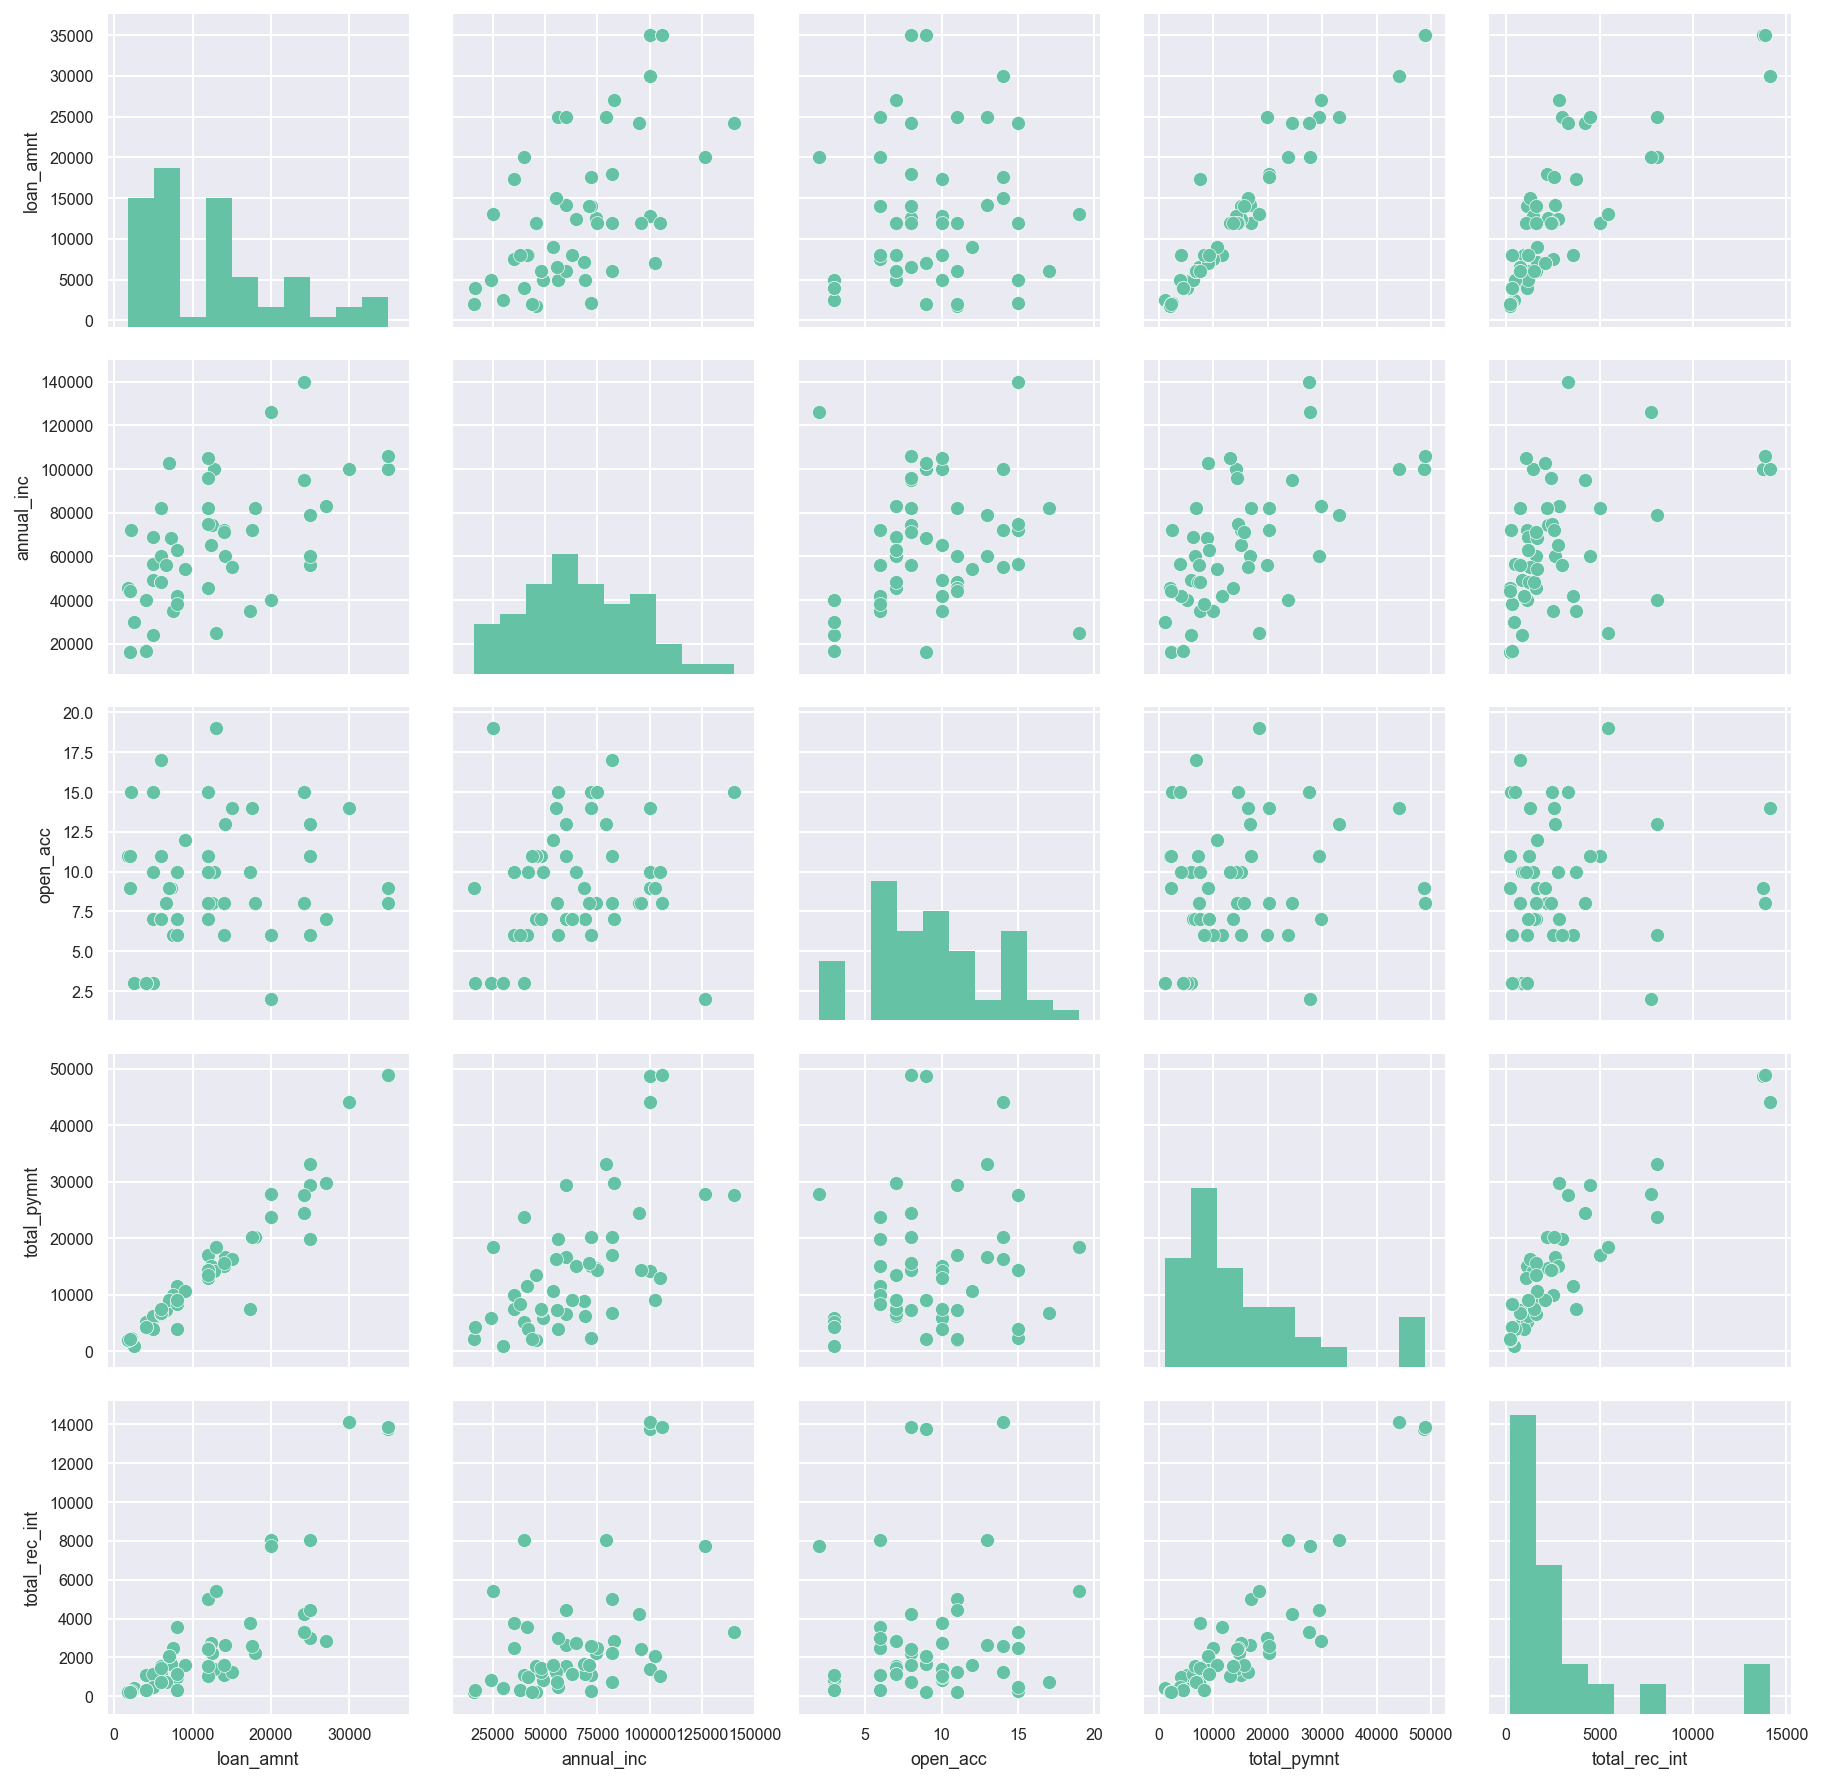

In [13]:
sns.pairplot(loan_data)

### 分组展示及渲染

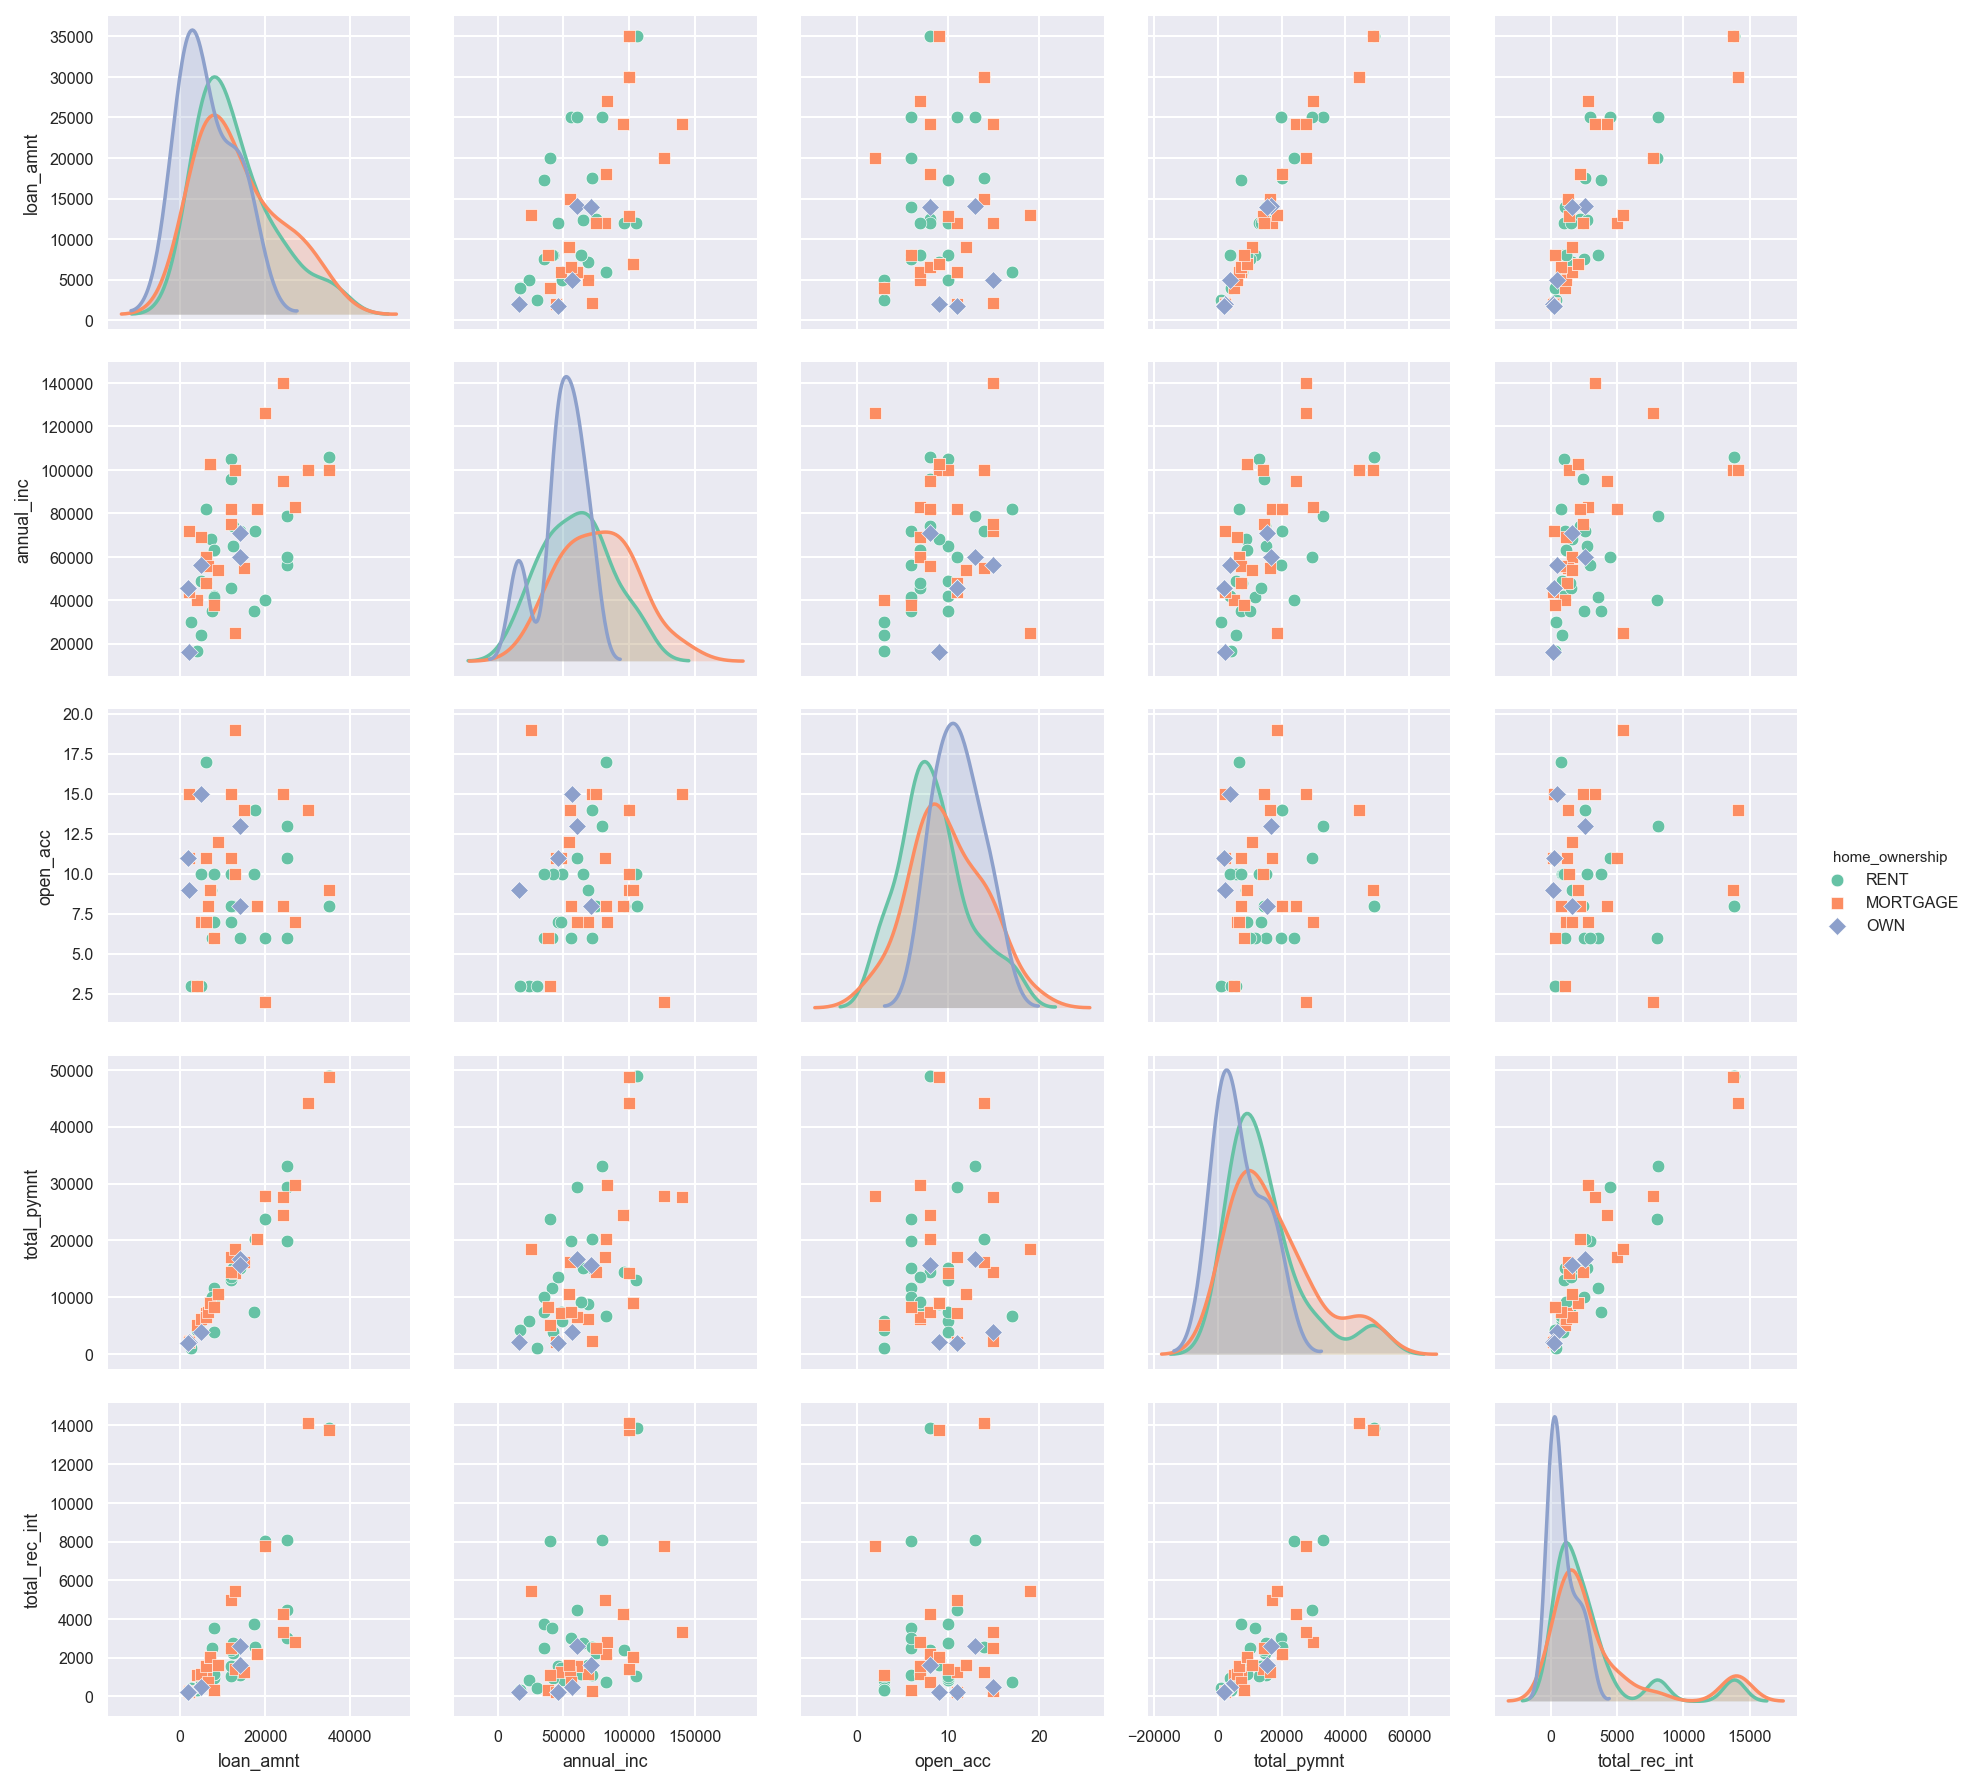

In [14]:
sns.pairplot(loan_data,
             #kind='reg',
             diag_kind='kde',
             hue='home_ownership',
             markers=["o", "s", "D"],
             plot_kws=dict(s=40),
             diag_kws=dict(shade=True))

In [40]:
plt.figure(figsize=(10,10))

In [ ]:
plt.

### `PairGrid`

可通过`PairGrid`的`map_lower`、`map_upper`、`map_diag`对子图进行调整。参考[Seaborn PairGrid](http://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)。

## 4 核密度图 `kdeplot`

### 单变量

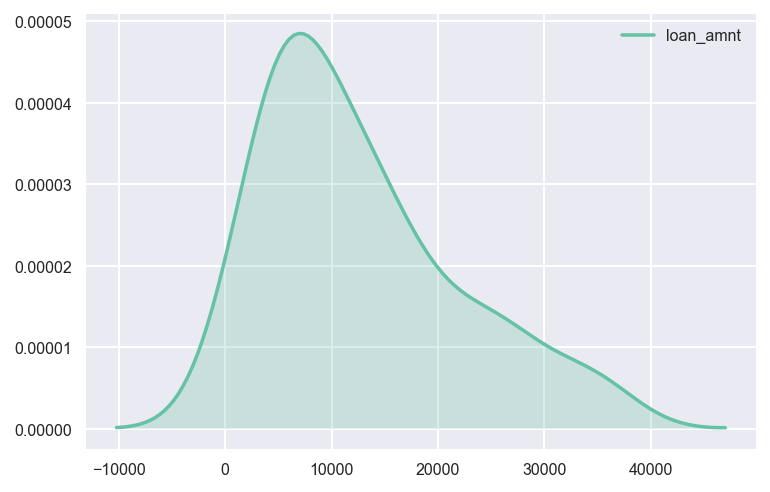

In [15]:
sns.kdeplot(loan_data['loan_amnt'],
            shade=True)

### 双变量和分组

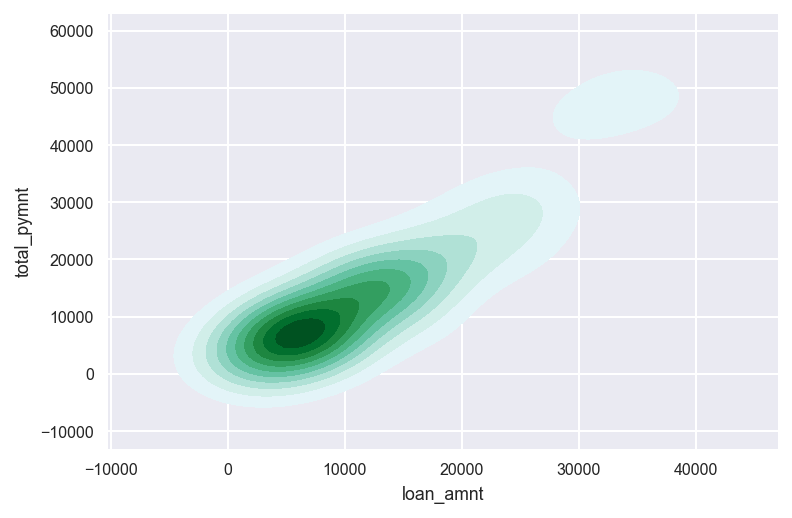

In [16]:
sns.kdeplot(loan_data['loan_amnt'],
            loan_data['total_pymnt'],
            shade=True,
            shade_lowest=False)

## 5 条形图 `barplot`

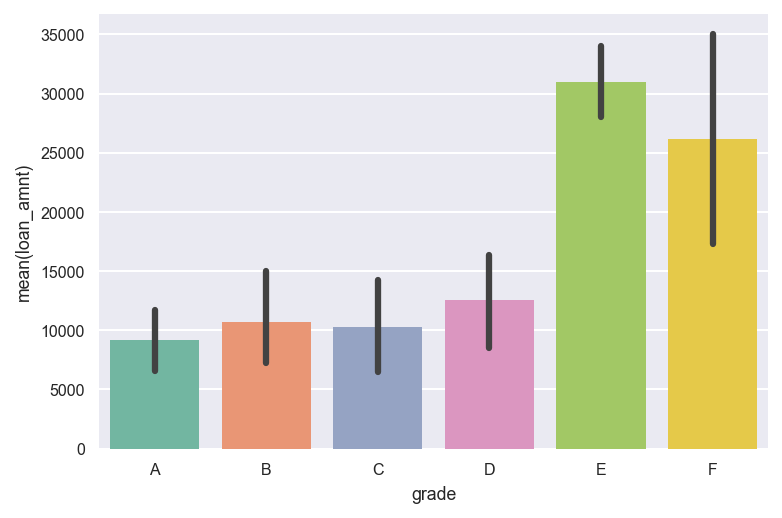

In [17]:
sns.barplot(x='grade',
            y='loan_amnt',
            order=list('ABCDEF'),
            data=loan_data)

## 6 数量统计图 `countplot`

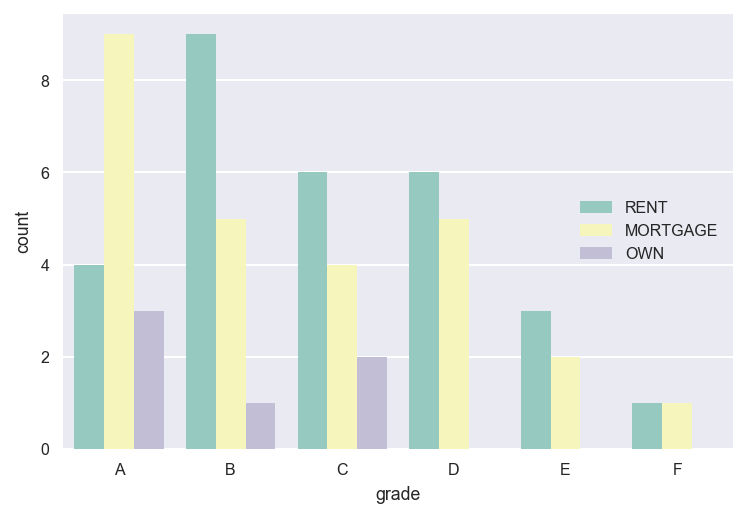

In [18]:
sns.countplot(x='grade',
              data=loan_data,
              hue='home_ownership',
              order=list('ABCDEF'),
              palette='Set3')
plt.legend(loc='right')

## 7 分布图 `distplot`

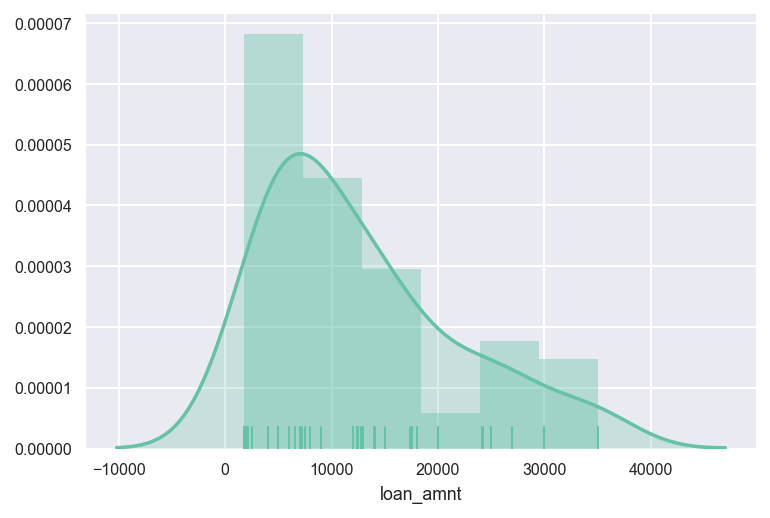

In [19]:
sns.distplot(loan_data['loan_amnt'],
             kde=True,
             hist=True,
             rug=True,
             kde_kws={'shade':True})

## 8 小提琴图 `violinplot`

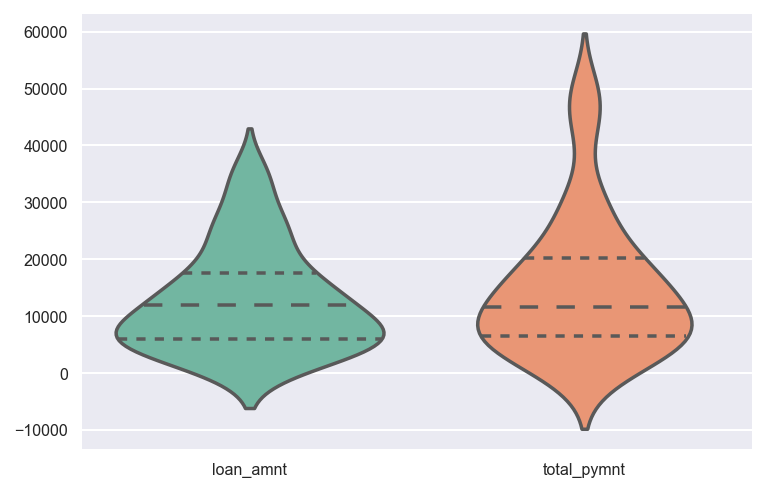

In [20]:
sns.violinplot(data=loan_data[['loan_amnt','total_pymnt']],
               inner='quart')

### 分组绘制小提琴图

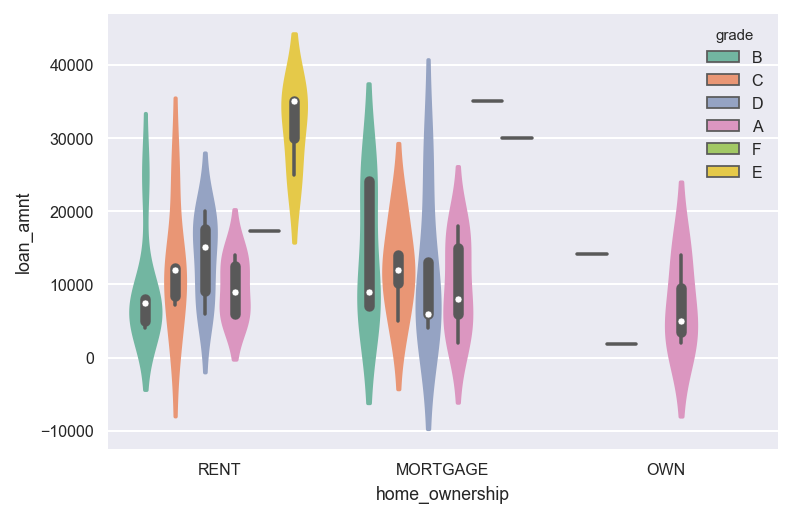

In [21]:
sns.violinplot(x='home_ownership',
               y='loan_amnt',
               hue='grade',
               data=loan_data)

两类分组参考[Grouped violinplots with split violins](http://seaborn.pydata.org/examples/grouped_violinplots.html)

## 9 面板网格式图形 `FacetGrid`

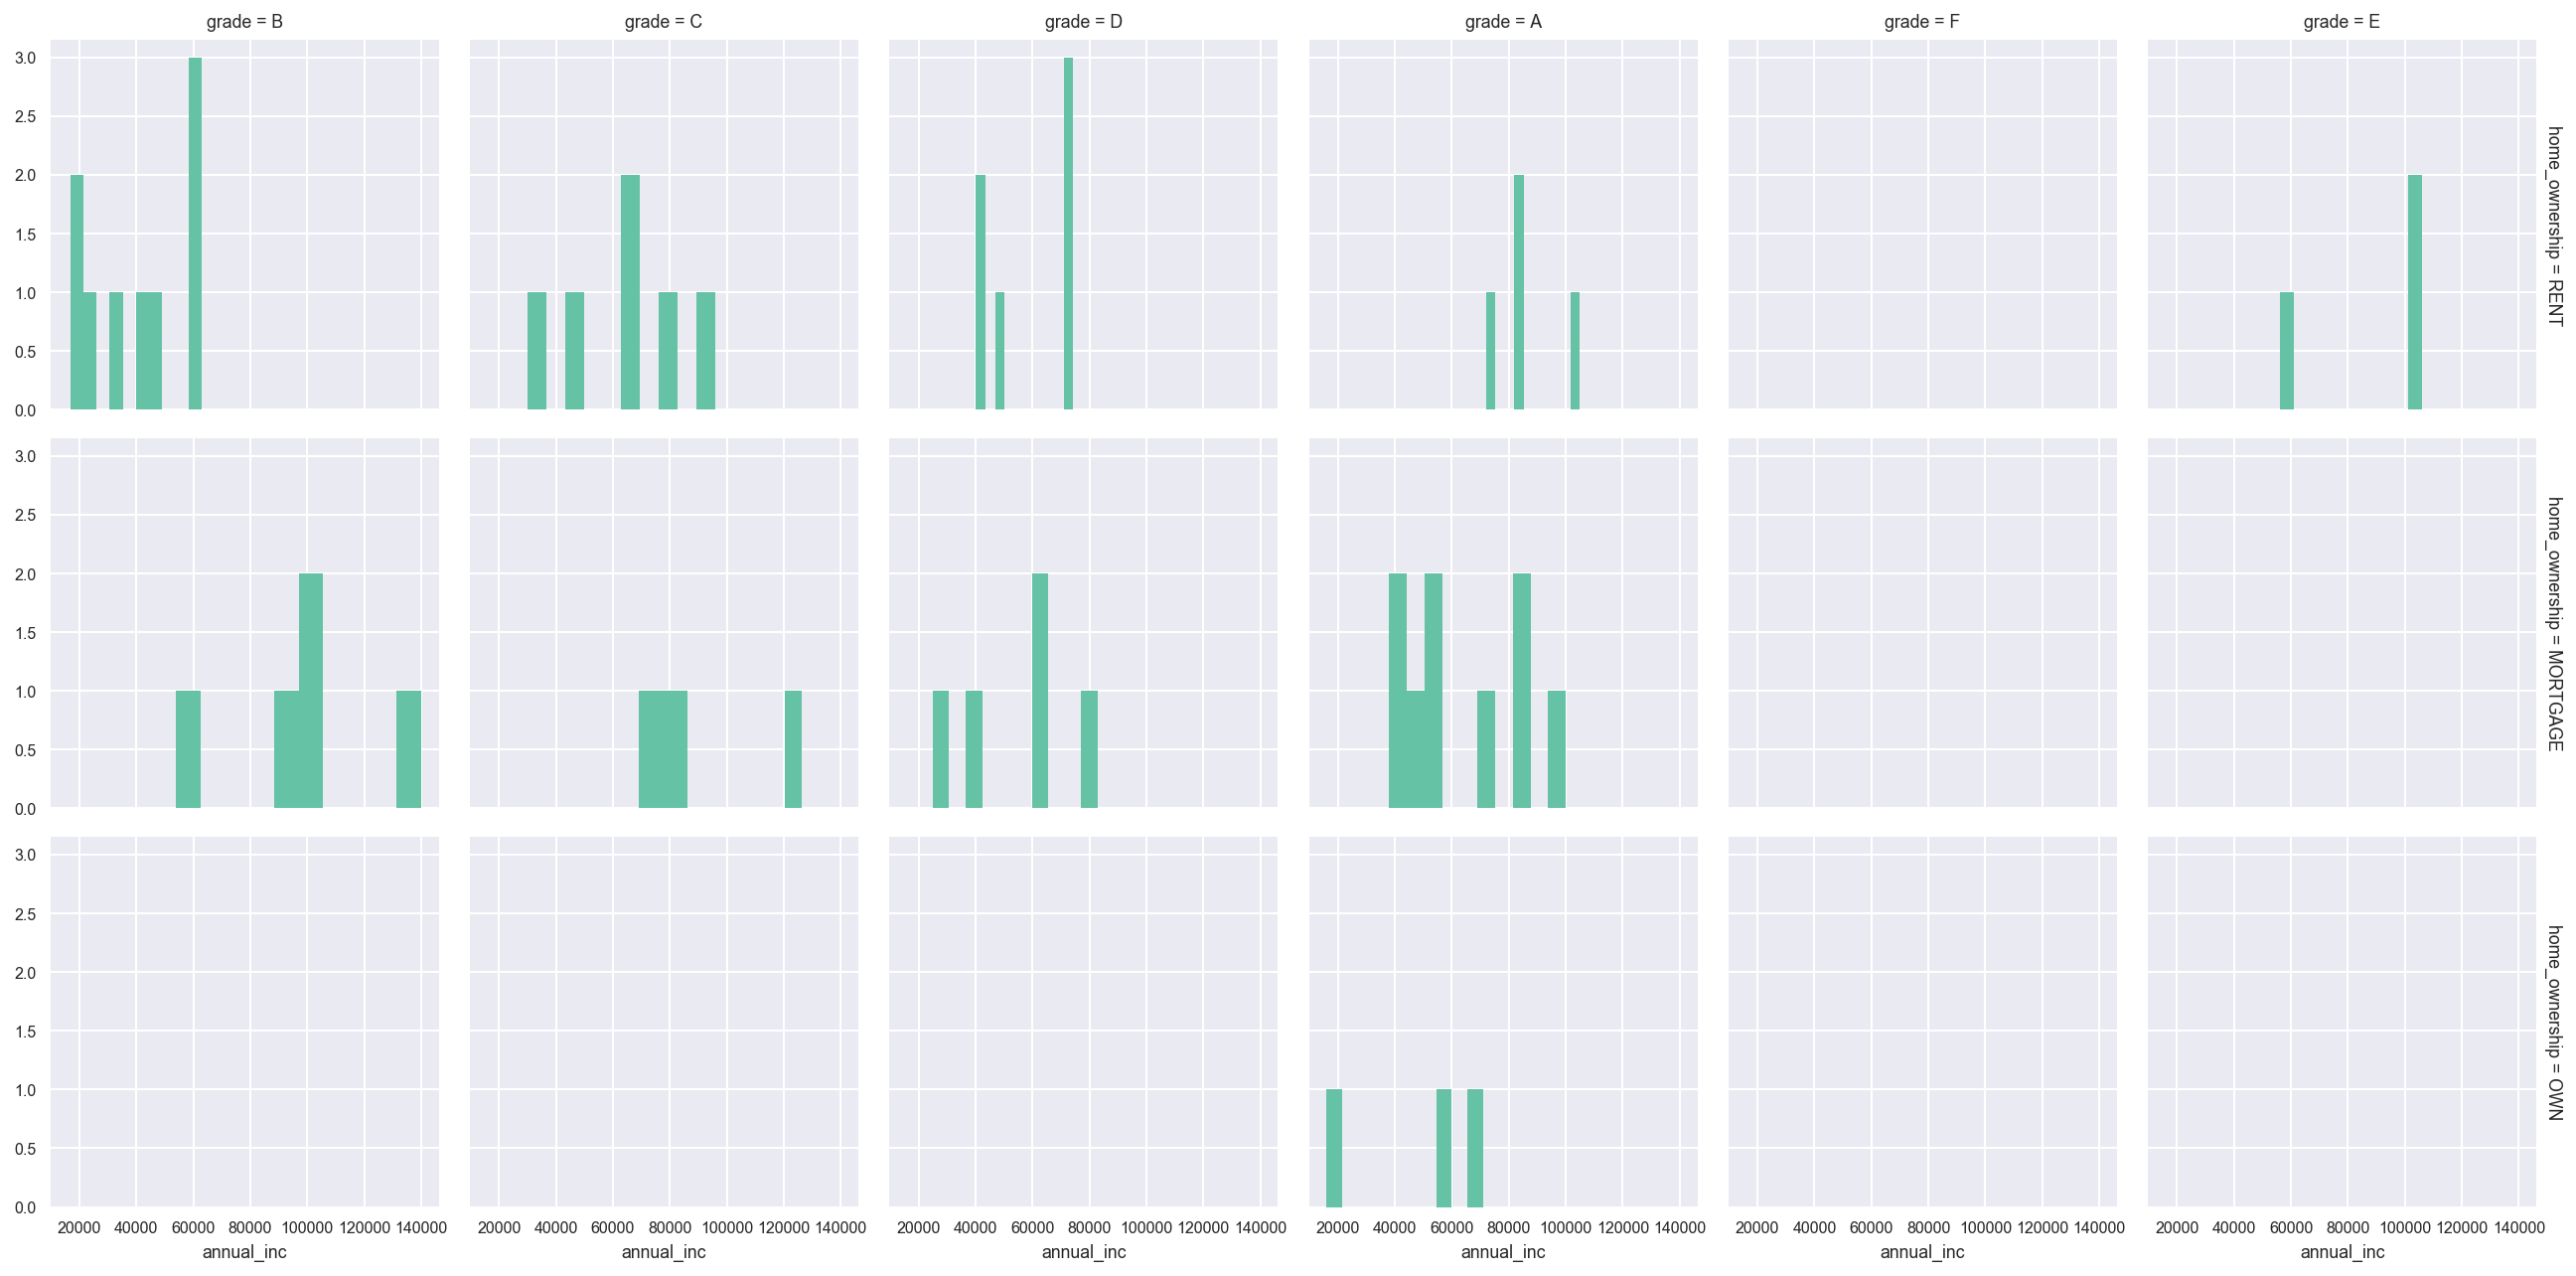

In [22]:
g = sns.FacetGrid(loan_data, 
                  row='home_ownership',
                  col='grade',
                  margin_titles=True)
g.map(plt.hist,'annual_inc')

## 10 盒图 `boxplot`

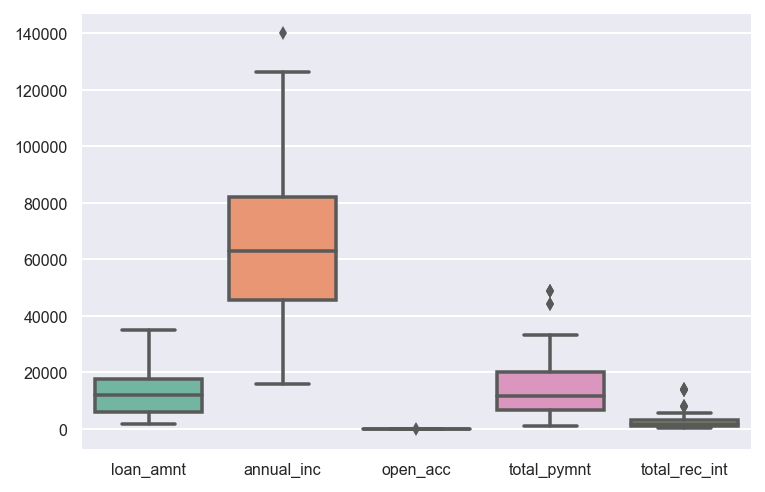

In [23]:
sns.boxplot(data=loan_data)

## 11 蜂群图 `swarmplot`

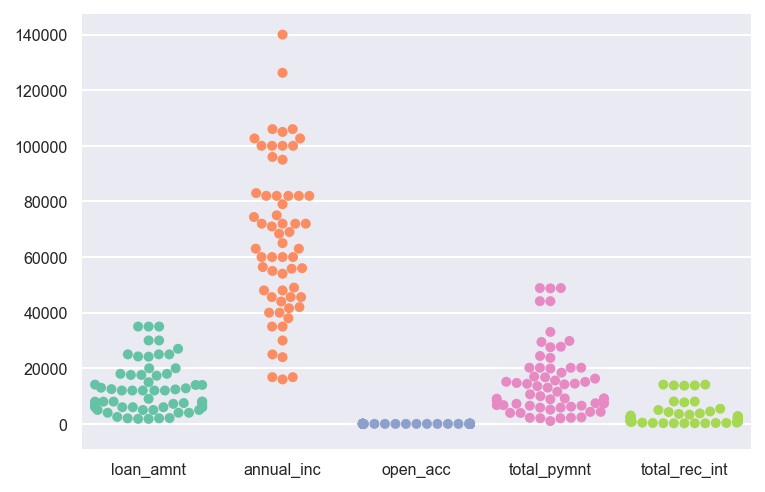

In [24]:
sns.swarmplot(data=loan_data)

### 与`boxplot`结合并美化渲染

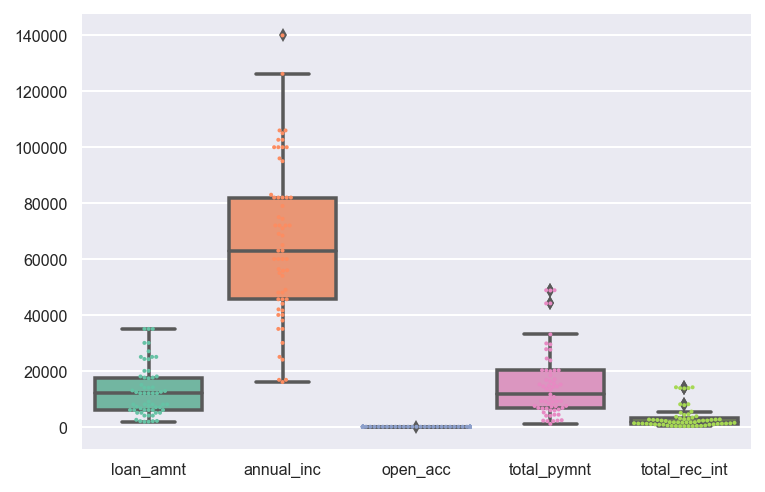

In [25]:
sns.boxplot(data=loan_data) 
sns.swarmplot(data=loan_data,size=2,linewidth=0)

## 12 热图 `heatmap`

日期数据结合`pivot`参考[annotated heatmaps](http://seaborn.pydata.org/examples/heatmap_annotation.html)

### 相关系数矩阵

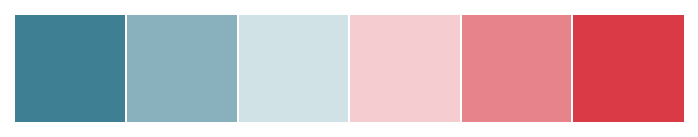

In [26]:
loan_corr = loan_data.corr()  # 数值型变量相关系数矩阵

sns.palplot(sns.diverging_palette(220, 10))

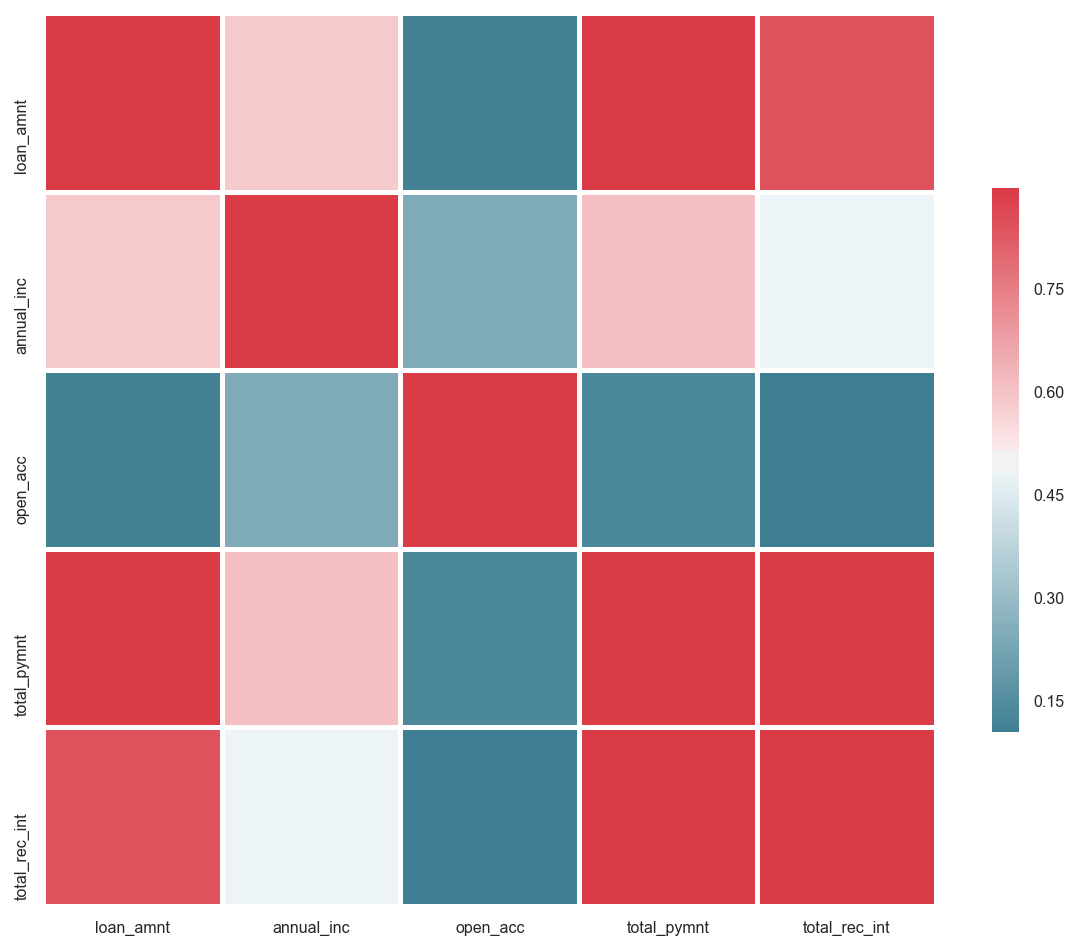

In [27]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # 相关系数矩阵常用 diverging_paletter
plt.figure(figsize=(10,10))
sns.heatmap(loan_corr, 
            cmap=cmap,
            vmax=.8,
            center=.5,
            square=True,
            linewidths=2,
            cbar_kws={'shrink':.5})

通过mask可以使得上三角隐藏。

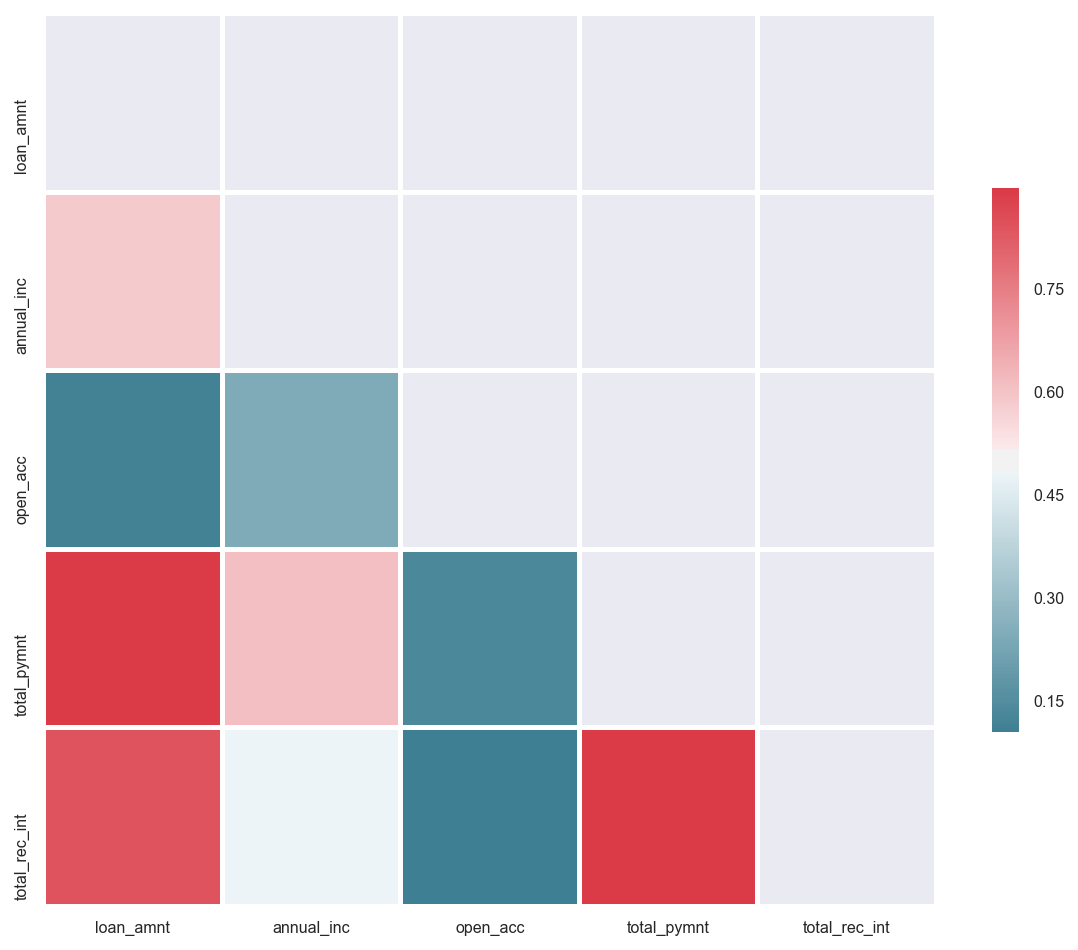

In [28]:
mask = np.zeros_like(loan_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(loan_corr, 
            cmap=cmap,
            mask=mask,
            vmax=.8,
            center=.5,
            square=True,
            linewidths=2,
            cbar_kws={'shrink':.5})

### 距离矩阵

In [29]:
from scipy.spatial.distance import pdist, squareform
from sklearn import preprocessing

在计算距离之前需要进行数据标准化。

In [30]:
loan_num_array = preprocessing.StandardScaler().fit_transform(loan_numerical)
dist_mat = squareform(pdist(loan_num_array))

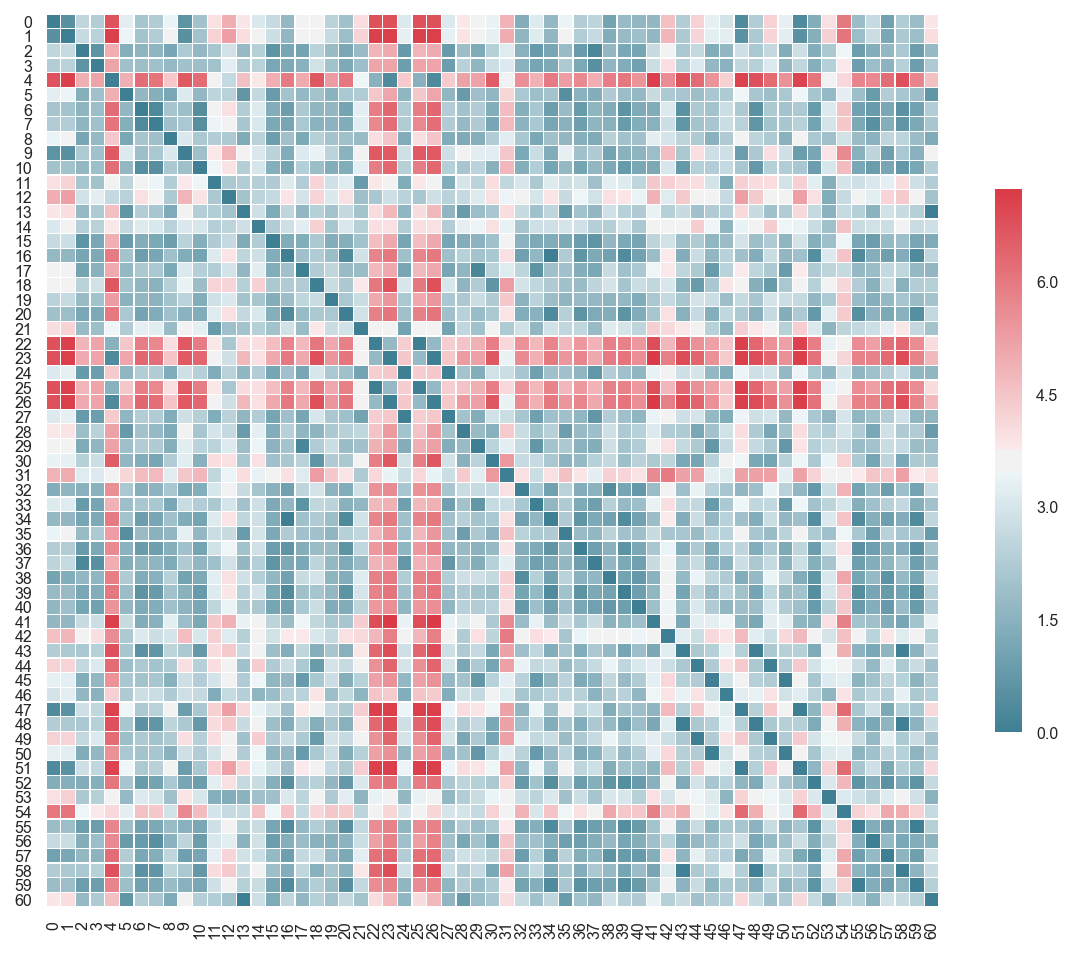

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(dist_mat, 
            cmap=cmap,
            square=True,
            linewidths=.1,
            cbar_kws={'shrink':.5})

In [32]:
loan_num_array = preprocessing.StandardScaler().fit_transform(loan_numerical)
dist_mat = squareform(pdist(loan_num_array))

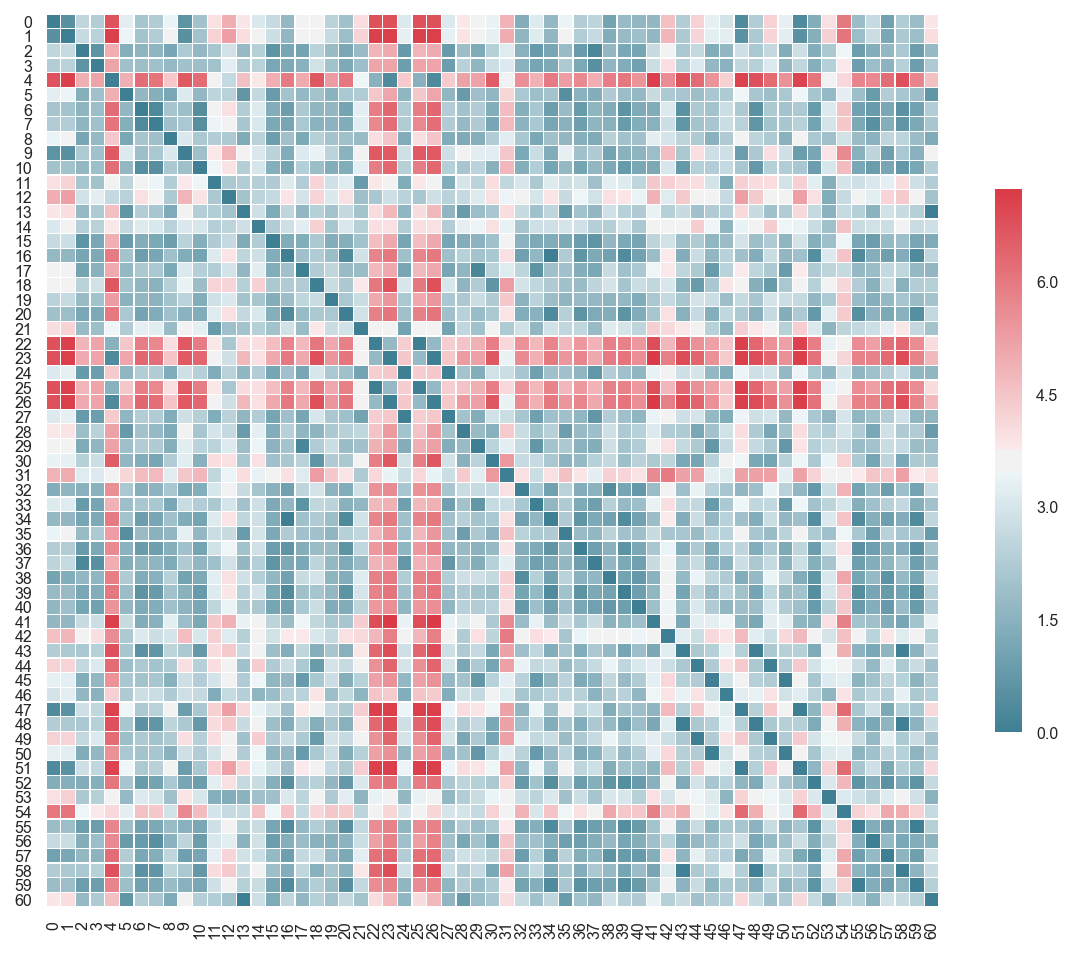

In [33]:
f, ax=plt.subplots(figsize=(10,10))# 设置图形大小
sns.heatmap(dist_mat, 
            cmap=cmap,
            square=True,
            linewidths=.1,
            cbar_kws={'shrink':.5})

## 13 聚类图 `clustermap`

### 样本聚类

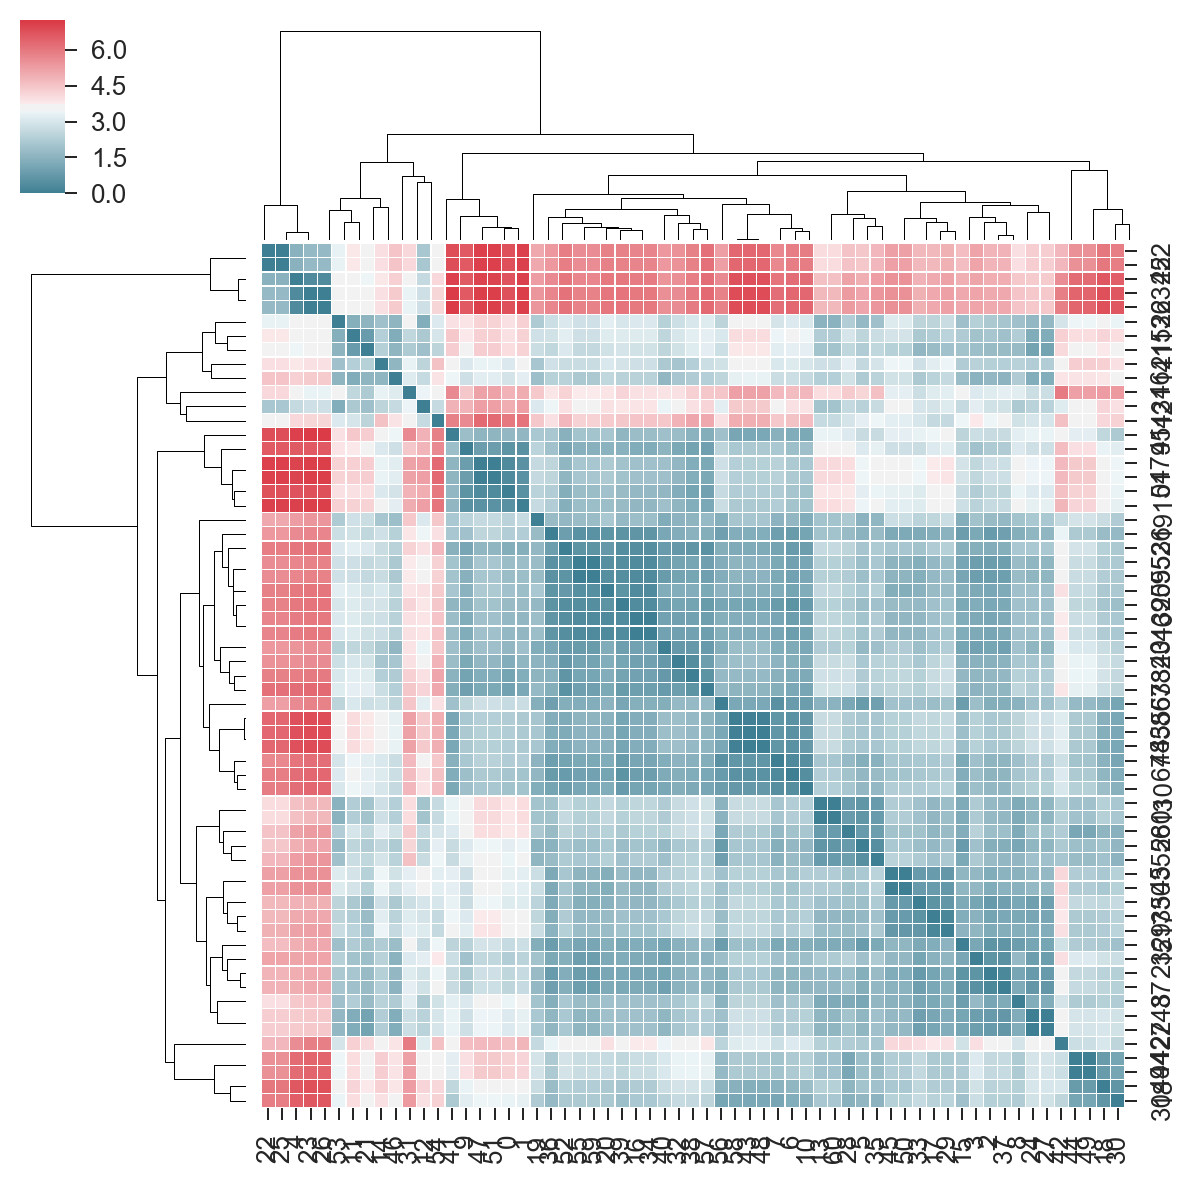

In [52]:
sns.clustermap(dist_mat,
               cmap=cmap,
               square=True,
               linewidths=.1)
plt.savefig('result.png')

### 特征聚类

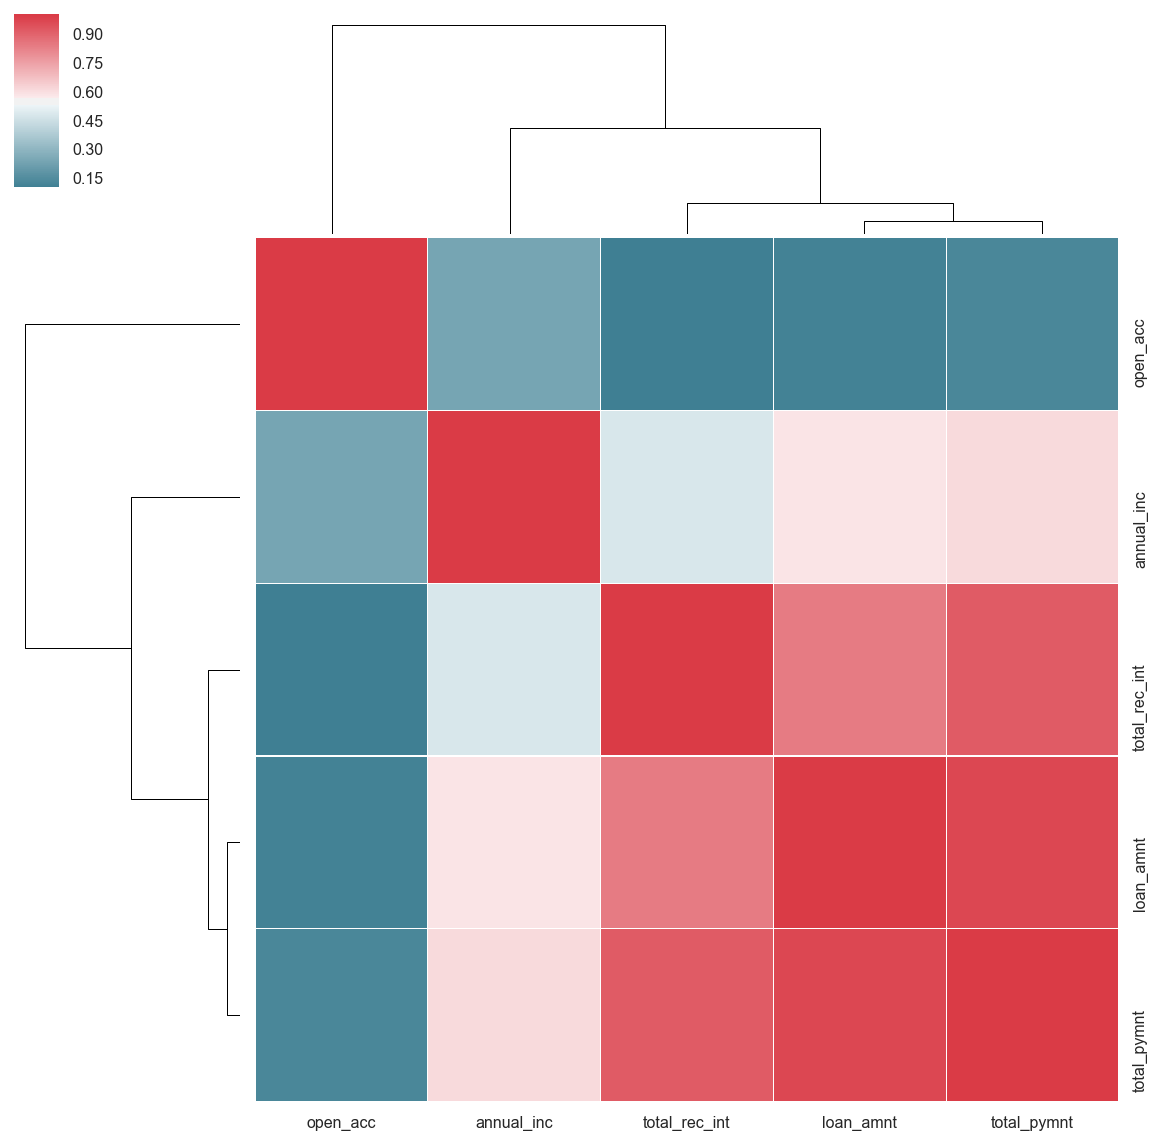

In [35]:
sns.clustermap(loan_corr, 
               cmap=cmap,
               square=True,
               linewidths=.1)

## 14 色系选择 `color_palette`

色系包括多个参数，可以自行选择，调整色系。

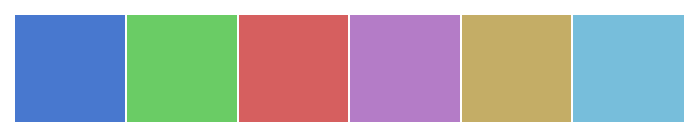

In [36]:
sns.palplot(sns.color_palette("muted"))

## 15 图形刻度、横纵坐标标记、标题等设置

In [ ]:
sns.set_style('ticks') # 只显示刻度
f, ax=plt.subplots(figsize=(15,15))# 设置图形大小
plt.tight_layout() # 紧密型排布
plt.box('off') # 隐藏边框
plt.xlim([0,1]) # 设置横轴刻度范围
plt.ylim([3,4]) # 设置纵轴刻度范围
plt.xlabel() # 设置横轴标记
plt.ylabel() # 设置纵轴标记
plt.title() # 设置标题
plt.legend() # 设置图注
plt.xscale('log') # 设置为对数坐标轴

## 16 图形存储

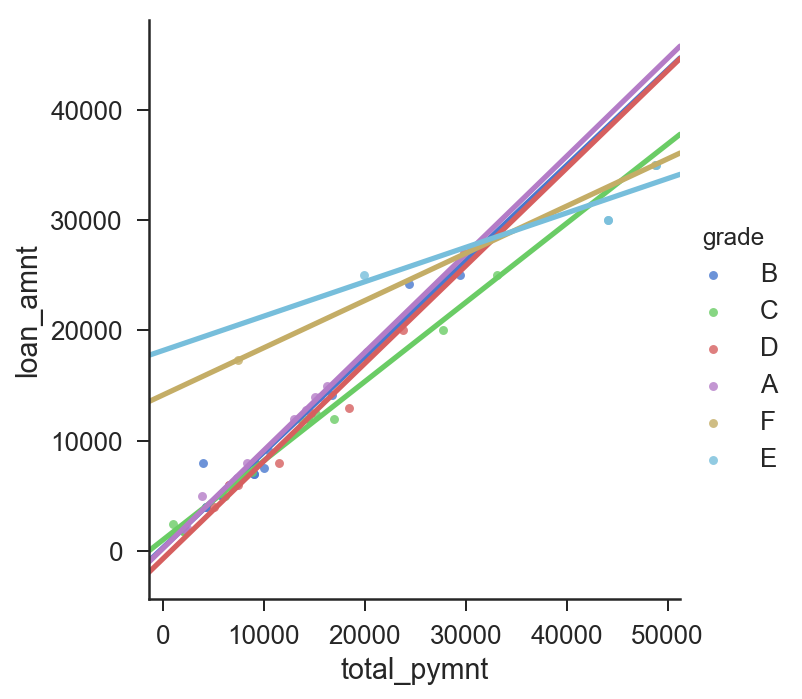

In [50]:
with sns.color_palette('muted'):
    sns.lmplot(x='total_pymnt',
           y='loan_amnt',
           data=loan_data,
           ci=None,
           scatter_kws={'s':20,'alpha':.8},hue='grade')
    